# German Traffic Sign Benchmark - Hue Histograms

## Overview

### Description of the data
The dataset is about the classification of images of German traffic signs into 43 distinct classes. The classes can be seen in the image below.
The classification is meant to be achieved by using only the global histogram of the hue values in HSV color space, resulting in 256 features per image.

![Traffic sign classes](traffic-sign-classes.png "Traffic sign classes")

In [22]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import openml

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
# TODO: DELETE KEY
openml.config.apikey = 'd3aa70dc3cdf0aeac05a5400172fd1e1'

In [24]:
RANDOM_STATE = 42

Loading the data doesn't require any altering of the plain text files.

In [2]:
dataset = openml.datasets.get_dataset(41990)

X, y, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format="array",
    target=dataset.default_target_attribute
    )

classes, class_counts = np.unique(y,return_counts=True)

# # Saving the dataset object structure
# import pprint
# with open('vars-dataset.txt', 'w', encoding='utf8') as f:
#     pprint.pprint(vars(dataset), stream=f)

In [3]:
# OpenML description

print(f'Dataset Name: {dataset.name}')
print(f'OpenML URL: {dataset.url}')
print(f'Original Data URL (link not working): {dataset.original_data_url}')
print(f'Paper URL: {dataset.paper_url}')

print('-'*60)
print(f'Description:\n{dataset.description}')
print('-'*60)

print(f'Licence {dataset.licence}')
print(f'Citation:\n{dataset.citation}')

Dataset Name: GTSRB-HueHist
OpenML URL: https://www.openml.org/data/v1/download/21389569/GTSRB-HueHist.arff
Original Data URL (link not working): http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset
Paper URL: https://www.ini.rub.de/upload/file/1470692848_f03494010c16c36bab9e/StallkampEtAl_GTSRB_IJCNN2011.pdf
------------------------------------------------------------
Description:
The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. We cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge.

# Pre-calculated features

To allow scientists without a background in image processing to participate, we several provide pre-calculated feature sets. Each feature set contains the same directory structure as the training image set. For details on the parameters of the feature al

* The sample size is 51839, with each sample comprising of 256 features (in essence they are 255 since the 256th is 1 - sum_of_the_rest).
* The headers are simply `pixel-00000, pixel-00001, ... , pixel-00255`. The rows don't have any special numbering.
* The class labels are in the `class` column and they are namely `0, 1, ... , 42`.
* There are no missing values in the dataset.

In [4]:
print(f'Number of samples: {X.shape[0]}')
print(f'Number of features: {X.shape[1]}')
print(f'Headers: {attribute_names[0]} ... {attribute_names[-1]}')
print(f'Class field: {dataset.default_target_attribute}')
print(f'Classes: {classes[0]} ... {classes[-1]}')
print(f'Number of samples with missing values: {np.sum(np.any(np.isnan(X), axis=1))}')
print(f'Percentage of sample with missing values: {np.mean(np.any(np.isnan(X), axis=1)): .2%}')


Number of samples: 51839
Number of features: 256
Headers: pixel-00000 ... pixel-00255
Class field: class
Classes: 0 ... 42
Number of samples with missing values: 0
Percentage of sample with missing values:  0.00%


In [5]:
# It is indeed a histogram
np.all(X >= 0) and np.all(np.isclose(np.sum(X, axis=1), 1))

True

The dataset is not balanced, since we can see that there are classes which are more than 1.5 times more frequent than some other class (11 times in our worst case).

In [6]:
rarest = np.argmin(class_counts)
most_common = np.argmax(class_counts)

print('The rarest class is {} with frequency {}.'.format(
    classes[rarest], class_counts[rarest]))
print('The most common class is {} with frequency {}.'.format(
    classes[most_common], class_counts[most_common]))
print('The most common class appears {:.1f} times more often than the rarest one.'.format(
    class_counts[most_common] / class_counts[rarest]))

The rarest class is 0 with frequency 270.
The most common class is 2 with frequency 3000.
The most common class appears 11.1 times more often than the rarest one.


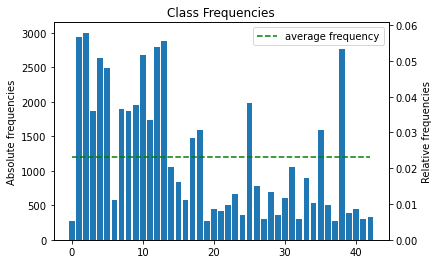

In [7]:
plt.bar(classes, class_counts)
plt.ylabel('Absolute frequencies')
plt.twinx()
plt.bar(classes, class_counts / y.shape[0])
plt.plot((classes[0], classes[-1]),
         (1/len(classes), 1/len(classes)),
        'g--',
        label='average frequency')
plt.legend()
plt.ylabel('Relative frequencies')
plt.title('Class Frequencies')
plt.show()

## Preparation

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

## Classification

In [ ]:
clf = LogisticRegression(random_state=RANDOM_STATE)

